<a href="https://colab.research.google.com/github/MeenakshiRajpurohit/CMPE180A/blob/main/Alzheimer's_DiseaseMLMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset successfully loaded. Here are the first 5 rows:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   Behaviora

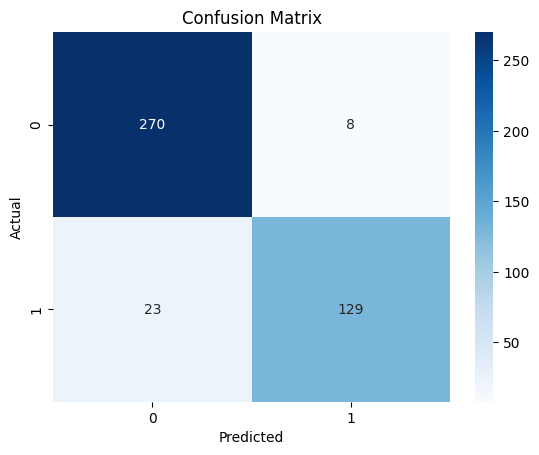


Top 10 Most Important Features:
                 feature  importance
23  FunctionalAssessment    0.175503
26                   ADL    0.163947
22                  MMSE    0.122116
24      MemoryComplaints    0.086391
25    BehavioralProblems    0.041871
20        CholesterolHDL    0.033037
7       PhysicalActivity    0.031257
9           SleepQuality    0.030969
6     AlcoholConsumption    0.030795
4                    BMI    0.030249


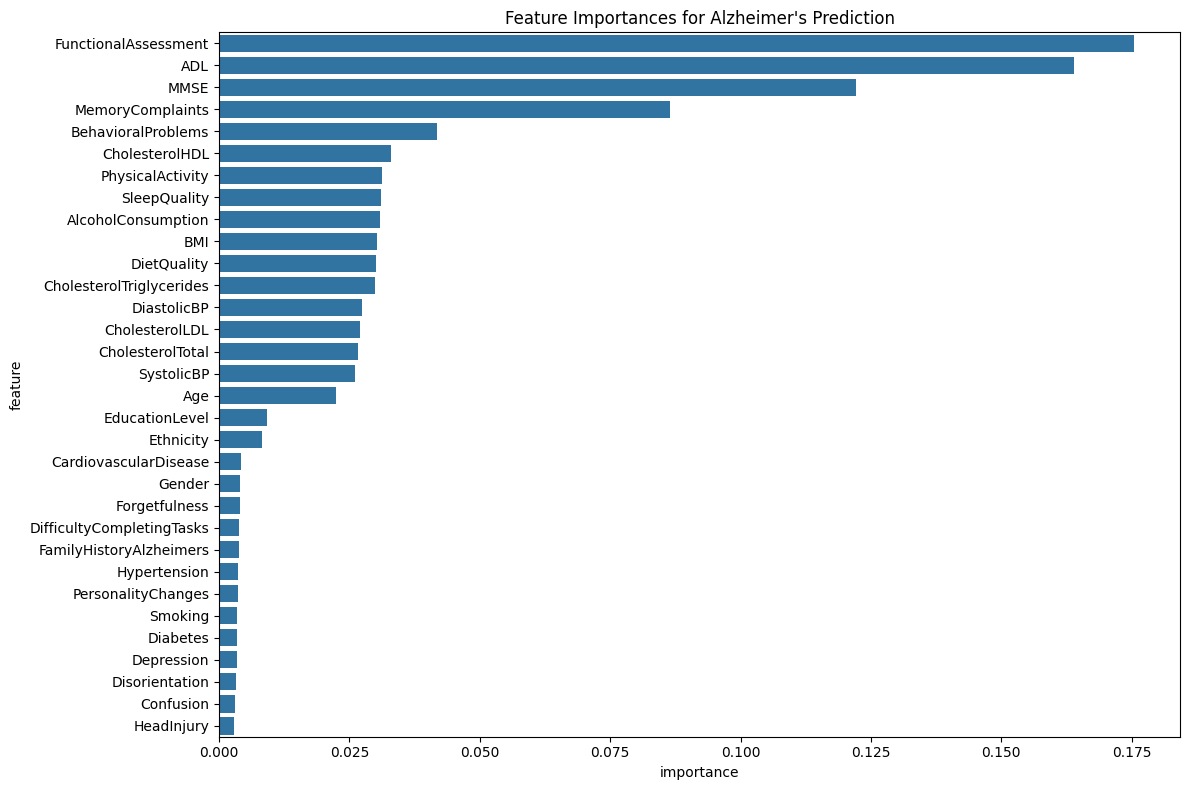

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load the Dataset ---
# The path is directly from the uploaded file information.
file_path = '/content/alzheimers_disease_data.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'.")
    print("Please ensure the file path is correct.")
    exit()

print("Dataset successfully loaded. Here are the first 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()

# --- 2. Data Preprocessing and Feature Selection ---
# Drop columns that are identifiers or not useful for prediction
# 'DoctorInCharge' is likely just a name/ID and not a predictive feature.
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

# For simplicity, we'll assume the target variable 'Diagnosis' is binary.
# We'll check for missing values and fill them if necessary, though this dataset looks clean.
print(f"\nMissing values before handling:\n{df.isnull().sum().sum()}")
# If there were missing values, a simple strategy would be:
# df.fillna(df.median(), inplace=True) # For numerical columns

# Define features (X) and the target (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

print(f"\nTarget variable distribution:\n{y.value_counts()}")

# --- 3. Splitting the Data and Scaling Features ---
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical columns to scale (all columns seem to be numeric in this dataset)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Model Training ---
# RandomForestClassifier is a great choice for this type of data.
# 'class_weight='balanced'' helps when one class has more samples than the other.
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model.fit(X_train_scaled, y_train)

# --- 5. Model Evaluation ---
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# --- 6. Feature Importance ---
# Analyze which features were most important for the model's predictions
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances for Alzheimer\'s Prediction')
plt.tight_layout()
plt.show()